In [ ]:
#Task 1

#Write an SQL query in Python to extract the country names and the regions associated with them.

In [1]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import mysql.connector as sql

In [3]:
import pandas as pd

In [4]:
db = sql.connect(host='localhost', user='root',password='Saara@39',database='priya')

In [5]:
mycursor = db.cursor()

In [6]:
sql = "SELECT country_name, region_name  FROM countries c \
JOIN regions r ON c.region_id = r.region_id"

mycursor.execute(sql)
country_data = mycursor.fetchall()
country_data

[('Argentina', 'Americas'),
 ('Australia', 'Asia'),
 ('Belgium', 'Europe'),
 ('Brazil', 'Americas'),
 ('Canada', 'Americas'),
 ('Switzerland', 'Europe'),
 ('China', 'Asia'),
 ('Germany', 'Europe'),
 ('Denmark', 'Europe'),
 ('Egypt', 'Middle East and Africa'),
 ('France', 'Europe'),
 ('HongKong', 'Asia'),
 ('Israel', 'Middle East and Africa'),
 ('India', 'Asia'),
 ('Italy', 'Europe'),
 ('Japan', 'Asia'),
 ('Kuwait', 'Middle East and Africa'),
 ('Mexico', 'Americas'),
 ('Nigeria', 'Middle East and Africa'),
 ('Netherlands', 'Europe'),
 ('Singapore', 'Asia'),
 ('United Kingdom', 'Europe'),
 ('United States of America', 'Americas'),
 ('Zambia', 'Middle East and Africa'),
 ('Zimbabwe', 'Middle East and Africa')]

In [ ]:
#Task 2

#Display country-wise employee counts in a new table and push it into an RDBMS. This needs joining of tables Once this task is completed, 
#this query can be executed directly using MySQL without the need of joins.

#Note: The relevant tables need to be first pulled into a DataFrame using Python. The necessary data transformations need to be coded in Python, 
#and then the relevant data needs to be pushed back to the RDBMS

In [10]:
# TASK 2  -  SQL query to create the EMPLOYEE_COUNT table
try:
    # Drop the table if it already exists
    mycursor.execute("DROP TABLE IF EXISTS EMPLOYEE_COUNT")

    # SQL query to create the new table
    sql = """
    CREATE TABLE EMPLOYEE_COUNT AS
    SELECT c.country_name, COUNT(e.employee_id) AS Total_employees
    FROM countries c
    JOIN locations l ON c.country_id = l.country_id
    JOIN departments d ON l.location_id = d.location_id
    JOIN employees e ON d.department_id = e.department_id
    GROUP BY c.country_name;
    """

    # Execute the SQL query
    mycursor.execute(sql)
    db.commit()  # Commit the changes

    # Fetch the data back into a DataFrame
    country_data = pd.read_sql("SELECT * FROM EMPLOYEE_COUNT", con=db)
    print(country_data)

except Exception as e:
    # Handle errors gracefully
    print(f"Error: {e}")



               country_name  Total_employees
0  United States of America               68
1            United Kingdom               35
2                    Canada                2
3                   Germany                1


C:\Users\marur\AppData\Local\Temp\ipykernel_5004\2942266396.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  country_data = pd.read_sql("SELECT * FROM EMPLOYEE_COUNT", con=db)


In [ ]:
#Task 3

#Display country-wise and city-wise employee counts

#Note: Once the necessary data is available, save it as a csv file and plot the graph using MS Excel or matplotlib library in Python.

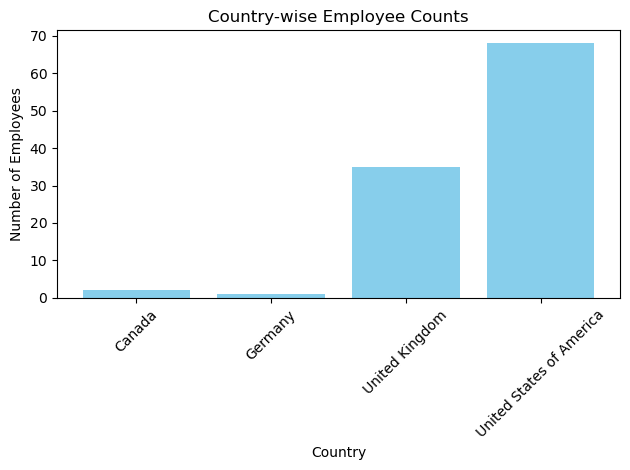

In [9]:
import matplotlib.pyplot as plt

import mysql.connector as sql
db = sql.connect(host='localhost', user='root', password='Saara@39', database='priya')
mycursor = db.cursor()


query = """
SELECT c.country_name, l.city, COUNT(e.employee_id) AS Total_employees
FROM countries c
JOIN locations l ON l.country_id = c.country_id 
JOIN departments d ON d.location_id = l.location_id 
JOIN employees e ON e.department_id = d.department_id 
GROUP BY c.country_name, l.city
"""

mycursor.execute(query)
country_data = mycursor.fetchall()

mycursor.close()
db.close()
country_df = pd.DataFrame(country_data, columns=['Country', 'City', 'EmployeeCount'])
country_df.to_csv('Country_counts.csv', index=False)
country_agg = country_df.groupby('Country')['EmployeeCount'].sum().reset_index()

plt.bar(country_agg['Country'], country_agg['EmployeeCount'], color='skyblue')
plt.title('Country-wise Employee Counts')
plt.xlabel('Country')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
